In [116]:
import pandas as pd

In [117]:
# load results.csv
df = pd.read_csv('results_2.csv')

In [118]:
df.head()

,data_hash,num_agents,num_groups,state_dim,num_actions,sequence_length,hidden_size,num_hidden_layers,epoch,loss,accuracy
0,data_e94dbedcea,4,4,64,8,4,32,1,0,1.782997,0.356243
1,data_e94dbedcea,4,4,64,8,4,32,1,1,1.710232,0.390445
2,data_e94dbedcea,4,4,64,8,4,32,1,2,1.671928,0.407974
3,data_e94dbedcea,4,4,64,8,4,32,1,3,1.641551,0.420839
4,data_e94dbedcea,4,4,64,8,4,32,1,4,1.615447,0.434793


In [ ]:
# choose only epoch 9 of the df
df = df[df['epoch'] == 9]

In [ ]:
# I want to get unique (num_agents, sequence_length, hidden_size, num_hidden_layers)
gp = df.groupby(['num_agents', 'sequence_length', 'hidden_size', 'num_hidden_layers'])

In [ ]:
# how many rows are there for each group
gp.size()

In [ ]:
# get the accuracy of each group
acc = gp['accuracy'].mean()

In [ ]:
acc

In [ ]:
df.loc[:, 'hidden_size_x_num_hidden_layers'] = df['hidden_size'] * df['num_hidden_layers']

In [ ]:
df.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot accuracy based on hidden_size x num_hidden_layers
lm = sns.lmplot(x='hidden_size_x_num_hidden_layers', y='accuracy', data=df)
lm.ax.set_xscale('log', base=2)
plt.title('Accuracy based on hidden_size x num_hidden_layers')

# Plot accuracy based on sequence_length
lm = sns.lmplot(x='sequence_length', y='accuracy', data=df)
lm.ax.set_xscale('log', base=2)
plt.title('Accuracy based on sequence_length')

# Plot accuracy based on num_agents
lm = sns.lmplot(x='num_agents', y='accuracy', data=df)
lm.ax.set_xscale('log', base=2)
lm.ax.set_yscale('log', base=2)
plt.title('Accuracy based on num_agents')

plt.show()

In [ ]:
import numpy as np
from scipy.stats import linregress

# Convert columns to log scale
df['log_num_agents'] = np.log2(df['num_agents'])
df['log_accuracy'] = np.log2(df['accuracy'])

# Fit a line to the log-log plot
slope, intercept, r_value, p_value, std_err = linregress(df['log_num_agents'], df['log_accuracy'])

# Plot accuracy based on num_agents on log-log scale
lm = sns.lmplot(x='log_num_agents', y='log_accuracy', data=df, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

plt.title('Accuracy based on num_agents')
plt.legend()

plt.show()

In [136]:
# load the dataframe from results.csv
df = pd.read_csv('results_2.csv')

# choose only epoch 9 of the df
df = df[df['epoch'] == 9]

# I want to get unique (num_agents, sequence_length, hidden_size x num_hidden_layers)
df.loc[:, 'hidden_size_x_num_hidden_layers'] = df['hidden_size'] * df['num_hidden_layers']

In [137]:
# I want to get unique (num_agents, sequence_length, hidden_size, num_hidden_layers) and their corresponding last epoch accuracy ( where epoch == 9)
last_epoch_acc = df.groupby(['num_agents', 'sequence_length', 'hidden_size', 'num_hidden_layers'])['accuracy'].max()

In [149]:
# I want to get unique (num_agents, sequence_length, hidden_size, num_hidden_layers) and their corresponding last epoch accuracy ( where epoch == 9)
last_epoch_loss = df.groupby(['num_agents', 'sequence_length', 'hidden_size', 'num_hidden_layers'])['loss'].min()

In [138]:
last_epoch_acc

num_agents  sequence_length  hidden_size  num_hidden_layers
1           4                32           1                    0.887370
                             64           2                    0.877602
                             128          4                    0.884260
                             256          8                    0.884851
            8                32           1                    0.874953
                                                                 ...   
32          16               256          8                    0.350590
            32               32           1                    0.358327
                             64           2                    0.347890
                             128          4                    0.357473
                             256          8                    0.354359
Name: accuracy, Length: 96, dtype: float64

In [139]:
# only choose num_agents = [4, 8, 16, 32]
df = df[df['num_agents'].isin([4, 8, 16, 32])]

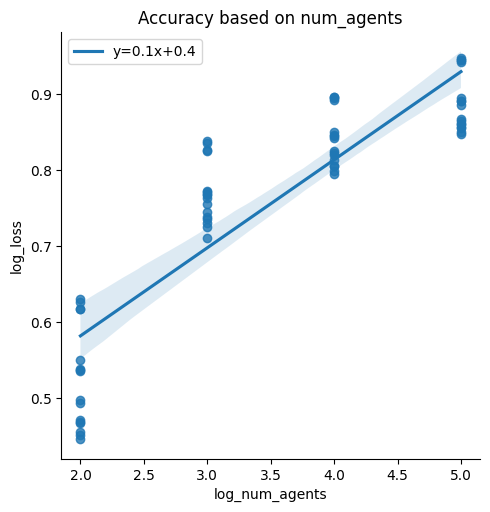

In [148]:
import numpy as np
from scipy.stats import linregress

# Convert columns to log scale
df['log_num_agents'] = np.log2(df['num_agents'])
df['log_accuracy'] = np.log2(df['accuracy'])
df['log_loss'] = np.log2(df['loss'])

# Fit a line to the log-log plot
slope, intercept, r_value, p_value, std_err = linregress(df['log_num_agents'], df['log_loss'])

# Plot accuracy based on num_agents on log-log scale
lm = sns.lmplot(x='log_num_agents', y='log_loss', data=df, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

plt.title('Accuracy based on num_agents')
plt.legend()

plt.show()

In [141]:
print('Slope:', slope)
print('Intercept:', intercept)

Slope: -0.20153399185334372
Intercept: -0.6532978948616288


In [151]:
num_agents_list = [1,2]

for num_agents in num_agents_list:
    # Check if there's a record for 32 agents
    if num_agents in last_epoch_loss.index.get_level_values('num_agents'):
        # Retrieve the accuracy from the DataFrame
        accuracy = last_epoch_loss.loc[num_agents].max()
        print(f"The loss for {num_agents} agents is {np.log2(accuracy)}, {accuracy}")

    # Extrapolate the accuracy using the linear regression model
    # print('Slope:', slope)
    # print('Intercept:', intercept)
    log_num_agents = np.log2(num_agents)
    log_accuracy = slope * log_num_agents + intercept
    accuracy = 2**log_accuracy
    print(f"The extrapolated loss for {num_agents} agents is {log_accuracy}, {accuracy}")

The extrapolated loss for 1 agents is 0.3503907348172958, 1.2749058719109658
The extrapolated loss for 2 agents is 0.46614590043374016, 1.381414144147564


In [ ]:
# Transform data to log2 scale
df_log2 = df.copy()
df_log2['num_agents'] = np.log2(df['num_agents'])
df_log2['sequence_length'] = np.log2(df['sequence_length'])
df_log2['hidden_size_x_num_hidden_layers'] = np.log2(df['hidden_size_x_num_hidden_layers'])
df_log2['accuracy'] = df['accuracy']

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_log2['hidden_size_x_num_hidden_layers'], df_log2['sequence_length'], df_log2['accuracy'], c=df['accuracy'], cmap='viridis')

ax.set_xlabel('hidden_size_x_num_hidden_layers (log2)')
ax.set_ylabel('sequence_length (log2)')
ax.set_zlabel('accuracy (log2)')

plt.title('Accuracy based on hidden_size_x_num_hidden_layers and sequence_length')
plt.show()

In [ ]:
def plot_3d(df, x, y, z):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    sc = ax.scatter(df_log2[x], df_log2[y], df_log2[z], c=df[z], cmap='viridis')

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)

    plt.title(f'{z} based on {x} and {y}')

    plt.colorbar(sc)

    plt.show()

# List of variables
variables = ['num_agents', 'sequence_length', 'hidden_size_x_num_hidden_layers']

# Generate 3D plots for all 2-combinations of variables
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        for k in range(len(variables)):
            if k != i and k != j:
                plot_3d(df, variables[i], variables[j], variables[k])

In [ ]:
def plot_3d(df, x, y, z):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Select only the columns you're interested in
    df = df[[x, y, z, 'accuracy']]

    # Group by z variable and calculate mean accuracy
    grouped = df.groupby(z).mean()

    # Plot x and y variables on x and y axes, and mean accuracy on z axis
    sc = ax.scatter(grouped[x], grouped[y], grouped['accuracy'], c=grouped.index, cmap='viridis')

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel('Mean Accuracy')

    plt.title(f'Mean Accuracy based on {x} and {y}')

    plt.colorbar(sc)

    plt.show()

# List of variables
variables = ['num_agents', 'sequence_length', 'hidden_size_x_num_hidden_layers']

# Generate 3D plots for all 2-combinations of variables
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        for k in range(len(variables)):
            if k != i and k != j:
                plot_3d(df_log2, variables[i], variables[j], variables[k])

In [ ]:
 df.dtypes

In [ ]:
from scipy.interpolate import griddata
import numpy as np

def plot_3d(df, x, y, z):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Create a grid of points
    xi = np.linspace(df[x].min(), df[x].max(), 100)
    yi = np.linspace(df[y].min(), df[y].max(), 100)
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate z values over the grid
    zi = griddata((df[x], df[y]), df[z], (xi, yi), method='linear')

    # Plot a wireframe
    ax.plot_wireframe(xi, yi, zi, color='k')

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)

    plt.title(f'{z} based on {x} and {y}')

    plt.show()

# List of variables
variables = ['num_agents', 'sequence_length', 'hidden_size_x_num_hidden_layers']

# Generate 3D plots for all 2-combinations of variables
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        for k in range(len(variables)):
            if k != i and k != j:
                plot_3d(df, variables[i], variables[j], variables[k])

In [ ]:
def plot_3d(df, x, y, z):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Plot x and y variables on x and y axes, z variable on z axis, and accuracy as color
    sc = ax.scatter(df[x], df[y], df[z], c=df['accuracy'], cmap='viridis')

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)

    plt.title(f'{z} based on {x} and {y} with accuracy')

    # Add a color bar
    plt.colorbar(sc, label='Accuracy')

    plt.show()

# List of variables
variables = ['num_agents', 'sequence_length', 'hidden_size_x_num_hidden_layers']

# Generate 3D plots for all 2-combinations of variables
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        for k in range(len(variables)):
            if k != i and k != j:
                plot_3d(df_log2, variables[i], variables[j], variables[k])

In [ ]:
from matplotlib import cm
from scipy.interpolate import griddata
import numpy as np

def plot_3d(df, x, y, z):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Create a grid of points
    xi = np.linspace(df[x].min(), df[x].max(), 100)
    yi = np.linspace(df[y].min(), df[y].max(), 100)
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate z values over the grid
    zi = griddata((df[x], df[y]), df[z], (xi, yi), method='linear')

    # Interpolate accuracy values over the grid for color mapping
    acc = griddata((df[x], df[y]), df['accuracy'], (xi, yi), method='linear')

    # Normalize to [0,1]
    norm = plt.Normalize(acc.min(), acc.max())

    # Plot a surface with facecolors set by the 'accuracy' colormap
    surf = ax.plot_surface(xi, yi, zi, rstride=1, cstride=1, facecolors=cm.viridis(norm(acc)), linewidth=0, antialiased=False, shade=False, alpha=0.5)

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)

    plt.title(f'{z} based on {x} and {y} with accuracy')

    # Add a color bar
    m = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
    m.set_array(acc)
    fig.colorbar(m, ax=ax, label='Accuracy')

    plt.show()

    return fig

# List of variables
variables = ['num_agents', 'sequence_length', 'hidden_size_x_num_hidden_layers']

# Generate 3D plots for all 2-combinations of variables
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        for k in range(len(variables)):
            if k != i and k != j:
                fig = plot_3d(df, variables[i], variables[j], variables[k])
                # save the plot
                fig.savefig(f'{variables[i]}_{variables[j]}_{variables[k]}.png')